In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pystan

In [14]:
import simulation, distributions
MoG = distributions.MixtureOfGaussians([0.8,0.2], [2,-1],[1,1])
Gaussian = distributions.Gaussian()
jumps = simulation.CPPSimulation(1, Gaussian).observe_jumps(1, 5000)
jumps[:5]

array([-2.50169959, -1.94048582, -0.51004943, -0.20407298, -0.22199685])

(array([  1.,   1.,   5.,   6.,  12.,  21.,  64., 130., 249., 456., 670.,
        872., 865., 673., 445., 244., 151.,  75.,  29.,  12.,   9.,   8.,
          1.]),
 array([-6. , -5.5, -5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. ,
        -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,
         5. ,  5.5]),
 <a list of 23 Patch objects>)

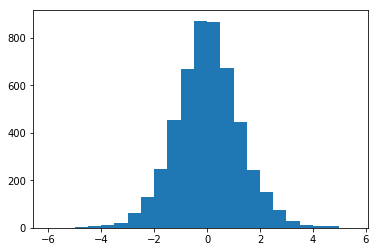

In [15]:
plt.hist(jumps, np.arange(-6,6,0.5))

In [41]:
model_code = """
data {
    int<lower=0> N;
    vector[N] jumps;
}
parameters {
    real psi;
    real mu;
    real tau;
    vector[N] aux;
}
model {
    psi ~ gamma(1,1);
    tau ~ gamma(1,1);
    mu ~ normal(0, 1.0/sqrt(tau));
    aux ~ normal(psi, 1.0);
    jumps ~ normal(mu*aux, 1.0/sqrt(tau));
}
"""

In [42]:
data = {'N': len(jumps), 'jumps': jumps}
fit = pystan.stan(model_code=model_code, data=data, iter=1000, chains=2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_49a6383b32d7d9157a4349713404fc1f NOW.


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  40., 188., 592.,
        166.,  14.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-2.0000000e+00, -1.8000000e+00, -1.6000000e+00, -1.4000000e+00,
        -1.2000000e+00, -1.0000000e+00, -8.0000000e-01, -6.0000000e-01,
        -4.0000000e-01, -2.0000000e-01, -4.4408921e-16,  2.0000000e-01,
         4.0000000e-01,  6.0000000e-01,  8.0000000e-01,  1.0000000e+00,
         1.2000000e+00,  1.4000000e+00,  1.6000000e+00,  1.8000000e+00]),
 <a list of 19 Patch objects>)

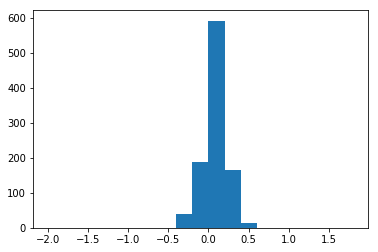

In [46]:
mu_sample = fit['mu']
plt.hist(mu_sample, bins=np.arange(-2,2,0.2))

In [48]:
from scipy.stats import poisson

In [68]:
arr = []
for _ in range(10000):
    arr.append(poisson.ppf(np.random.uniform(low=poisson.pmf(0, 1)), 1))
np.mean(arr)

1.5905

In [54]:
a = []
a.append(2)
a

[2]

In [69]:
arr1 = []
for _ in range(10000):
    a = np.random.poisson(1)
    while a == 0: a = np.random.poisson(1)
    arr1.append(a)
np.mean(arr1)

1.571